# Importing Dataset and Library

In [ ]:
!pip install yfinance

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(18,8))
plt.rc('lines', markersize=4)
plt.rc('font', size=18)
!rm -rf ./logs/
from sklearn.metrics import confusion_matrix
import seaborn as sns

import plotly.graph_objs as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/PythonMidterm/

 CricketMethods.py		  'IPL Matches 2008-2020.csv'
'Final Project ToDo.gdoc'	   __pycache__
 __init__.py			  'Python Midterm.ipynb'
'IPL Ball-by-Ball 2008-2020.csv'   StocksMethods.py


In [ ]:
import os
os.chdir('/content/drive/My Drive/PythonMidterm/')
import StocksMethods as sto

In [ ]:
INTEL_data = yf.download("INTC", start="2015-01-01", end="2022-03-31")

[*********************100%***********************]  1 of 1 completed


# EDA

In [ ]:
INTEL_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,29.616629,23605600
2015-01-05,36.200001,36.450001,35.939999,35.950001,29.282667,32785000
2015-01-06,36.080002,36.230000,35.259998,35.279999,28.736917,30847600
2015-01-07,35.639999,36.070000,35.270000,36.020000,29.339682,27725200
2015-01-08,36.369999,37.000000,36.259998,36.689999,29.885418,31765400


In [ ]:
INTEL_data.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-29,52.00,52.290001,51.279999,52.25,51.840218,27303700
2022-03-30,52.25,52.509998,51.220001,51.43,51.026649,24623300


In [ ]:
INTEL_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824 entries, 2015-01-02 to 2022-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1824 non-null   float64
 1   High       1824 non-null   float64
 2   Low        1824 non-null   float64
 3   Close      1824 non-null   float64
 4   Adj Close  1824 non-null   float64
 5   Volume     1824 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.8 KB


In [ ]:
INTEL_data.shape

(1824, 6)

In [ ]:
##Check for null values
sto.StockDataHandling.find_null_values(INTEL_data)

No of Null Values: 50


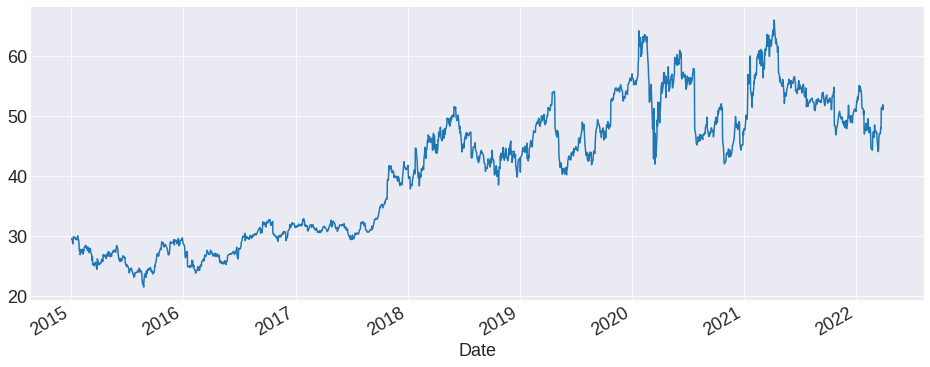

In [ ]:
INTEL_data['Adj Close'].plot(figsize = (16,6))

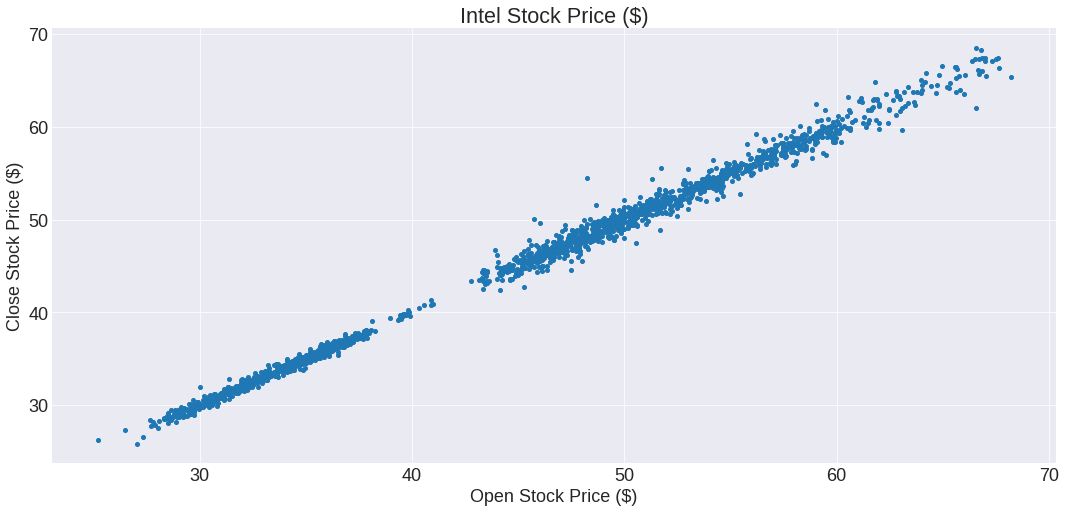

In [ ]:
plt.title('Intel Stock Price ($)')
plt.xlabel('Open Stock Price ($)')
plt.ylabel('Close Stock Price ($)')
plt.scatter(INTEL_data['Open'],INTEL_data['Close'])
plt.show()

# Linear Predication

In [ ]:
futuredays = 50

In [ ]:
INTEL_data['prediction'] = INTEL_data[['Close']].shift(-futuredays)
INTEL_data

,Open,High,Low,Close,Adj Close,Volume,prediction
Date,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,29.616629,23605600,30.590000
2015-01-05,36.200001,36.450001,35.939999,35.950001,29.282667,32785000,30.889999
2015-01-06,36.080002,36.230000,35.259998,35.279999,28.736917,30847600,30.740000
2015-01-07,35.639999,36.070000,35.270000,36.020000,29.339682,27725200,31.309999
2015-01-08,36.369999,37.000000,36.259998,36.689999,29.885418,31765400,31.200001
...,...,...,...,...,...,...,...
2022-03-24,48.660000,51.650002,48.590000,51.619999,51.215157,51677900,NaN
2022-03-25,50.689999,51.980000,50.450001,51.830002,51.423515,33239800,NaN
2022-03-28,51.360001,51.570000,50.560001,51.509998,51.106018,22932400,NaN


In [ ]:
x = np.array(INTEL_data.drop(['prediction'], 1))[:-futuredays]
x

array([[3.66699982e+01, 3.71599998e+01, 3.61100006e+01, 3.63600006e+01,
        2.96166286e+01, 2.36056000e+07],
       [3.62000008e+01, 3.64500008e+01, 3.59399986e+01, 3.59500008e+01,
        2.92826672e+01, 3.27850000e+07],
       [3.60800018e+01, 3.62299995e+01, 3.52599983e+01, 3.52799988e+01,
        2.87369175e+01, 3.08476000e+07],
       ...,
       [5.60000000e+01, 5.62099991e+01, 5.47700005e+01, 5.49399986e+01,
        5.40970268e+01, 2.96054000e+07],
       [5.48499985e+01, 5.57700005e+01, 5.45299988e+01, 5.57000008e+01,
        5.48453674e+01, 3.01515000e+07],
       [5.53100014e+01, 5.56500015e+01, 5.46800003e+01, 5.47599983e+01,
        5.39197884e+01, 3.53138000e+07]])

In [ ]:
y =np.array(INTEL_data['prediction'])[:-futuredays]
y

array([30.59000015, 30.88999939, 30.73999977, ..., 51.50999832,
       52.25      , 51.43000031])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
linear = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = INTEL_data.drop(['prediction'], 1)[:-futuredays]
x_future = x_future.tail(futuredays)
x_future = np.array(x_future)
x_future

In [ ]:
linear_prediction = linear.predict(x_future)

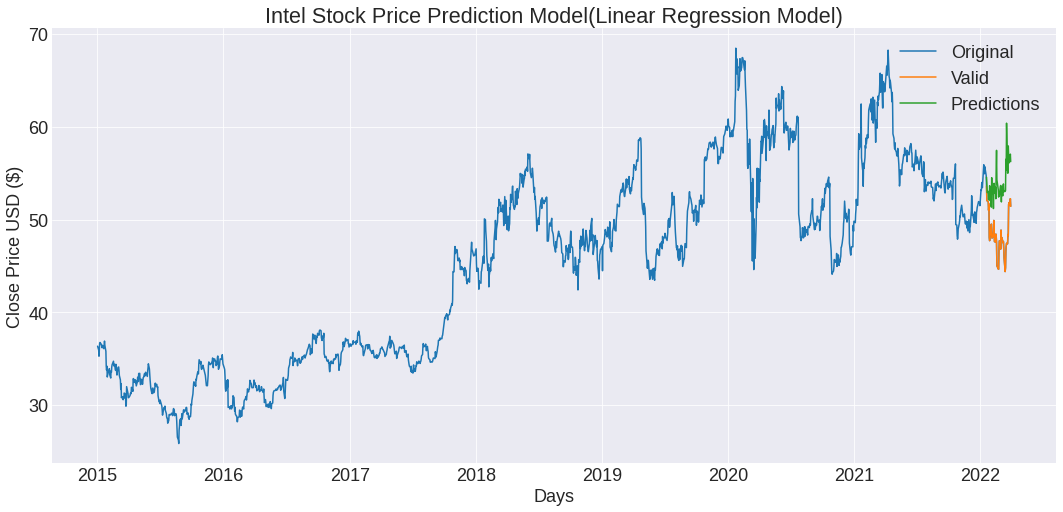

In [ ]:
predictions = linear_prediction
valid = INTEL_data[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Intel Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(INTEL_data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

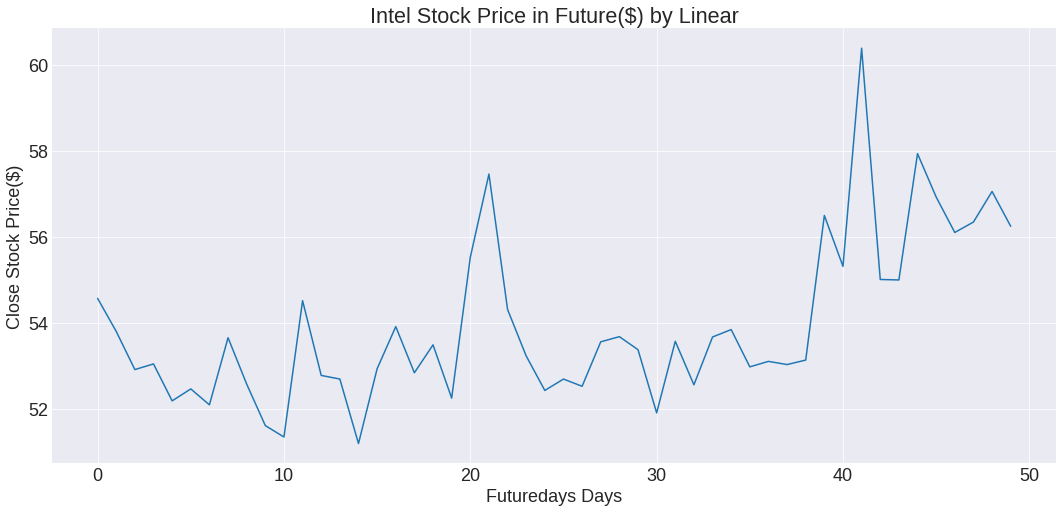

In [ ]:
plt.title('Intel Stock Price in Future($) by Linear')
plt.xlabel('Futuredays Days')
plt.ylabel('Close Stock Price($)')
plt.plot(linear_prediction)

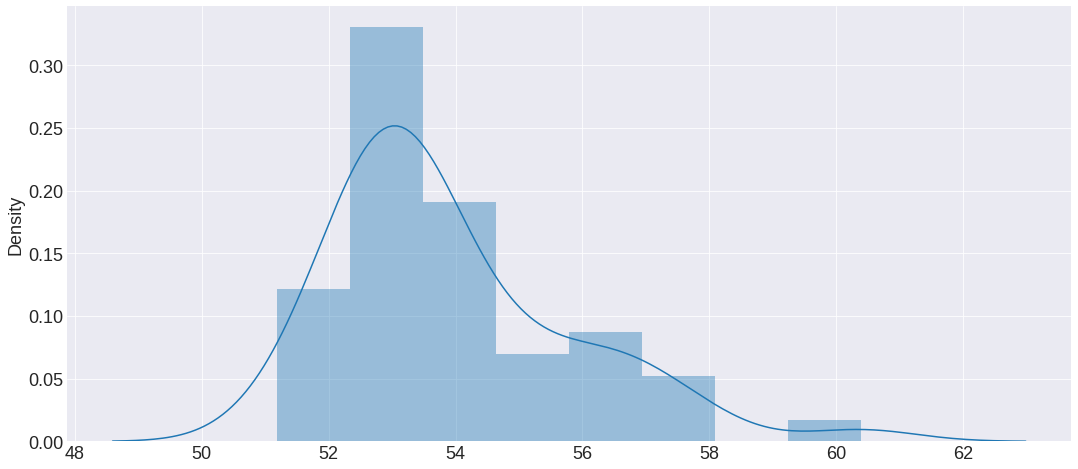

In [ ]:
sns.distplot(linear_prediction)

# Decision Tree

In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)

In [ ]:
tree_prediction = tree.predict(x_future)

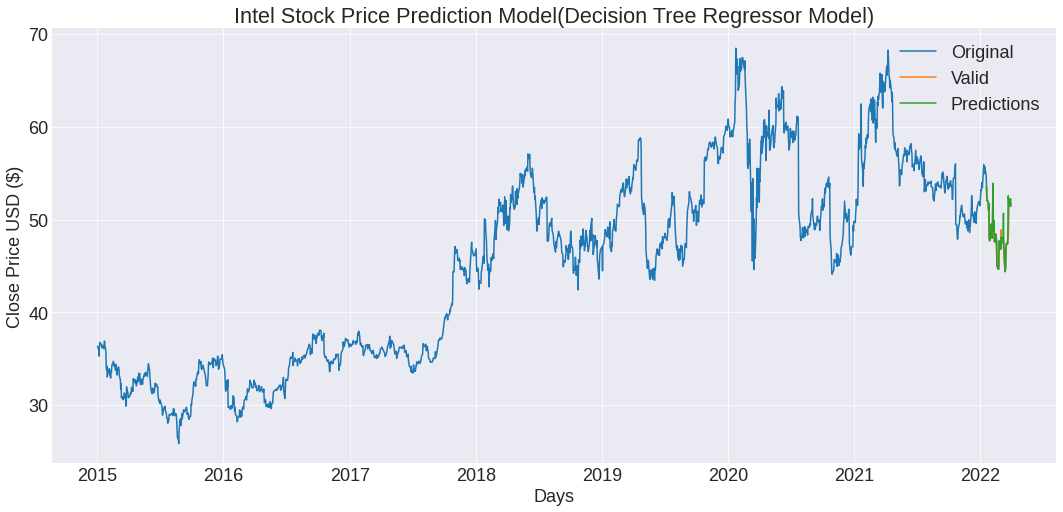

In [ ]:
predictions = tree_prediction
valid = INTEL_data[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Intel Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(INTEL_data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

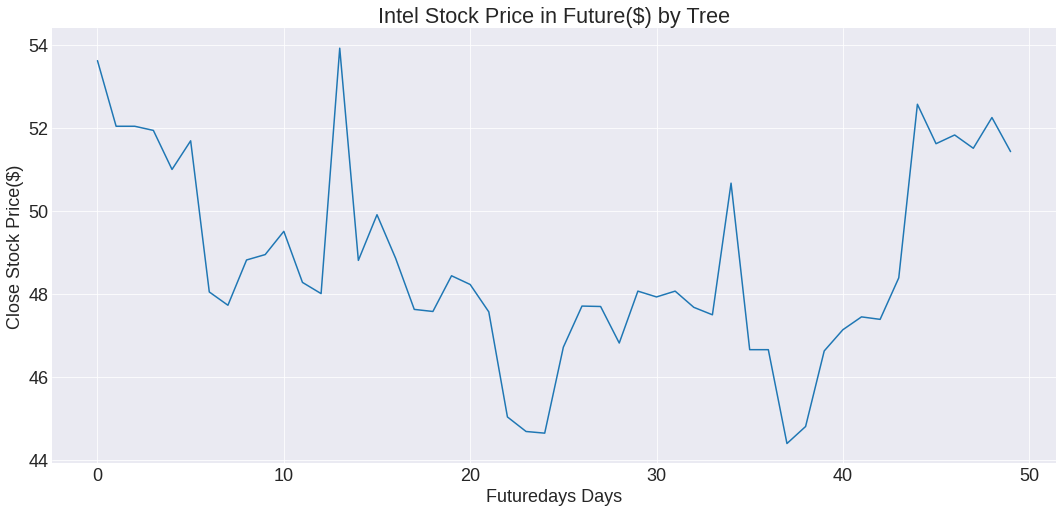

In [ ]:
plt.title('Intel Stock Price in Future($) by Tree')
plt.xlabel('Futuredays Days')
plt.ylabel('Close Stock Price($)')
plt.plot(tree_prediction)

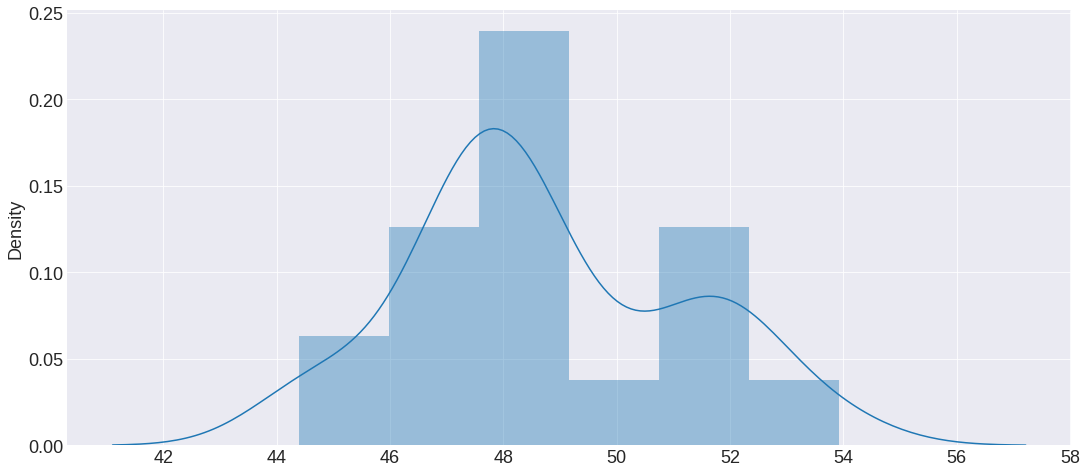

In [ ]:
sns.distplot(tree_prediction)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Set up column for strategy 1
sto.StockDataHandling.strategy_one(INTEL_data)

INTEL_data.head()

,Open,High,Low,Close,Adj Close,Volume,prediction,Strategy1
Date,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,29.616629,23605600,30.590000,-1
2015-01-05,36.200001,36.450001,35.939999,35.950001,29.282667,32785000,30.889999,-1
2015-01-06,36.080002,36.230000,35.259998,35.279999,28.736917,30847600,30.740000,1
2015-01-07,35.639999,36.070000,35.270000,36.020000,29.339682,27725200,31.309999,1
2015-01-08,36.369999,37.000000,36.259998,36.689999,29.885418,31765400,31.200001,1


In [ ]:
##Identifying Variables
##important to use double brackets

xfeature = INTEL_data[['Adj Close']]
yfeature = INTEL_data[['Strategy1']]

xfeature.head()

,Adj Close
Date,
2015-01-02,29.616629
2015-01-05,29.282667
2015-01-06,28.736917
2015-01-07,29.339682
2015-01-08,29.885418


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [ ]:
## Pre-feature scaling description
x_train.describe()

,Adj Close
count,1459.000000
mean,41.112274
std,11.014018
min,21.554314
25%,30.434405
50%,43.299740
75%,49.560019
max,65.911568


In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
scaler.data_min_

array([21.55431366])

In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
S2listofmodels = []
S2listofaccuracies = []

# Random Forest - Strategy 1

In [ ]:
INTEL_data.head()

,Open,High,Low,Close,Adj Close,Volume,prediction,Strategy1
Date,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,29.616629,23605600,30.590000,-1
2015-01-05,36.200001,36.450001,35.939999,35.950001,29.282667,32785000,30.889999,-1
2015-01-06,36.080002,36.230000,35.259998,35.279999,28.736917,30847600,30.740000,1
2015-01-07,35.639999,36.070000,35.270000,36.020000,29.339682,27725200,31.309999,1
2015-01-08,36.369999,37.000000,36.259998,36.689999,29.885418,31765400,31.200001,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 8)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [ ]:
from sklearn import metrics

y_pred = rf_clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest - Strategy 1")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5041095890410959


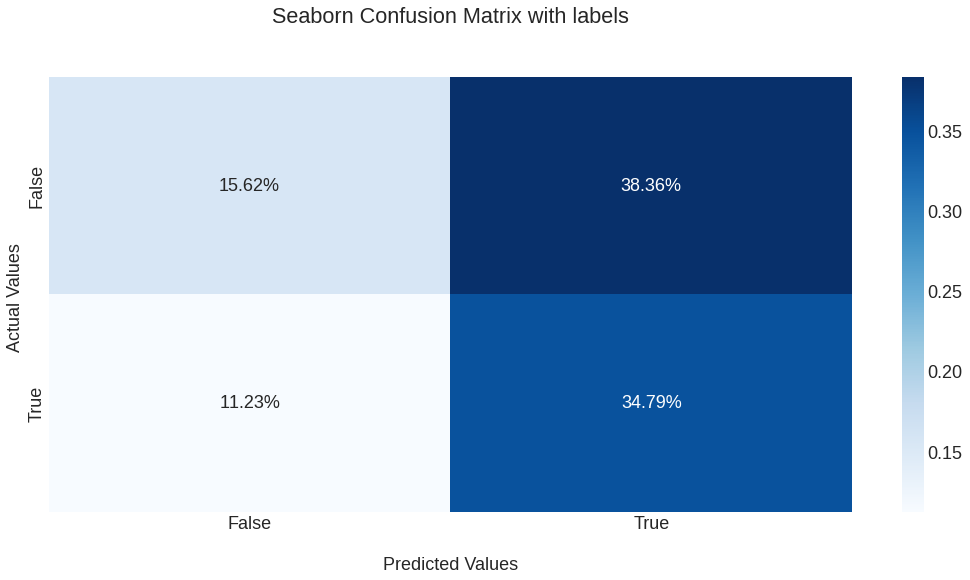

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Random Forest - Strategy 2

In [ ]:
##Calculating Averages

rolling_mean = INTEL_data['Adj Close'].rolling(window=50).mean()
rolling_mean2 = INTEL_data['Adj Close'].rolling(window=200).mean()

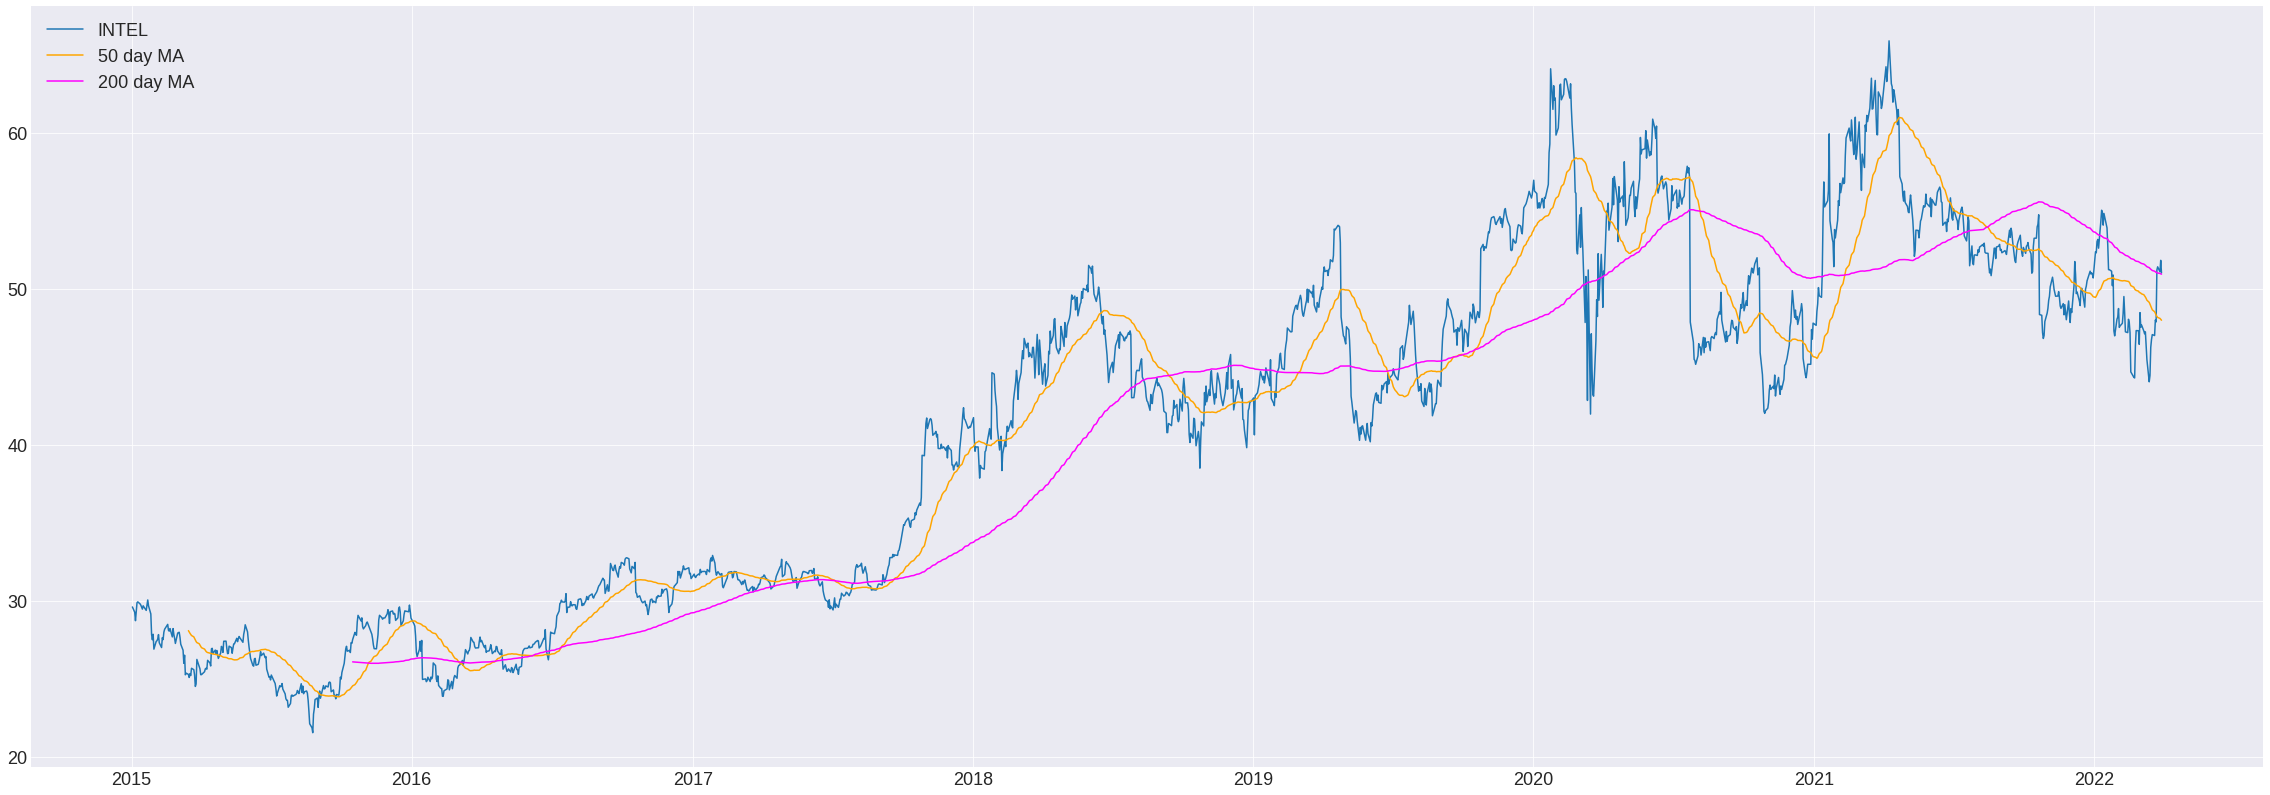

In [ ]:
plt.figure(figsize=(40,14))
MAfigure = plt.plot(INTEL_data['Adj Close'], label='INTEL')
plt.plot(rolling_mean, label='50 day MA', color='orange')
plt.plot(rolling_mean2, label='200 day MA', color='magenta')


plt.legend(loc='upper left')

plt.show()

In [ ]:
##Set up collumn for strategy two
strategy2 = np.where(rolling_mean > rolling_mean2, 1, -1)
INTEL_data["Strategy2"] = strategy2
INTEL_data.head()

,Open,High,Low,Close,Adj Close,Volume,prediction,Strategy1,Strategy2
Date,,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,29.616629,23605600,30.590000,-1,-1
2015-01-05,36.200001,36.450001,35.939999,35.950001,29.282667,32785000,30.889999,-1,-1
2015-01-06,36.080002,36.230000,35.259998,35.279999,28.736917,30847600,30.740000,1,-1
2015-01-07,35.639999,36.070000,35.270000,36.020000,29.339682,27725200,31.309999,1,-1
2015-01-08,36.369999,37.000000,36.259998,36.689999,29.885418,31765400,31.200001,1,-1


In [ ]:
##Identifying Variables
##important to use double brackets

xfeature = INTEL_data[['Adj Close']]
yfeature = INTEL_data['Strategy2']

xfeature.head()

,Adj Close
Date,
2015-01-02,29.616629
2015-01-05,29.282667
2015-01-06,28.736917
2015-01-07,29.339682
2015-01-08,29.885418


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 1008, max_depth = 8)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1008)

In [ ]:
y_pred = rf_clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest - Strategy 2")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6876712328767123


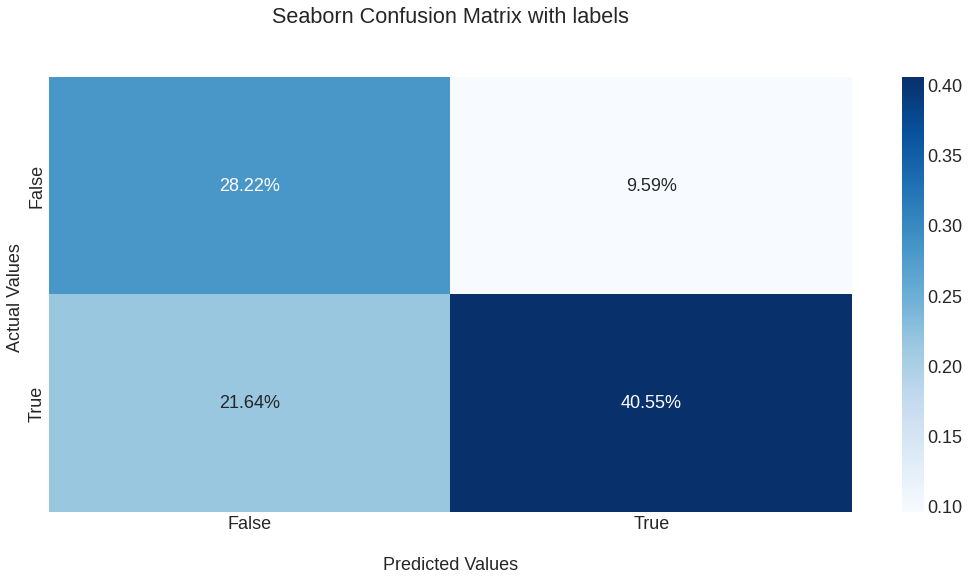

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Random Forest - Strategy 3

In [ ]:
!pip install AlmaIndicator
from AlmaIndicator import ALMAIndicator

In [ ]:
alma = ALMAIndicator(close = INTEL_data['Adj Close'])

In [ ]:
alma_nums = sto.StockDataHandling.calc_alma(INTEL_data)
alma_nums

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2022-03-24    47.958007
2022-03-25    48.921649
2022-03-28    49.945058
2022-03-29    50.780957
2022-03-30    51.193369
Name: alma, Length: 1824, dtype: float64

In [ ]:
ema = sto.StockDataHandling.calc_ema(INTEL_data)
ema.shape

(1824,)

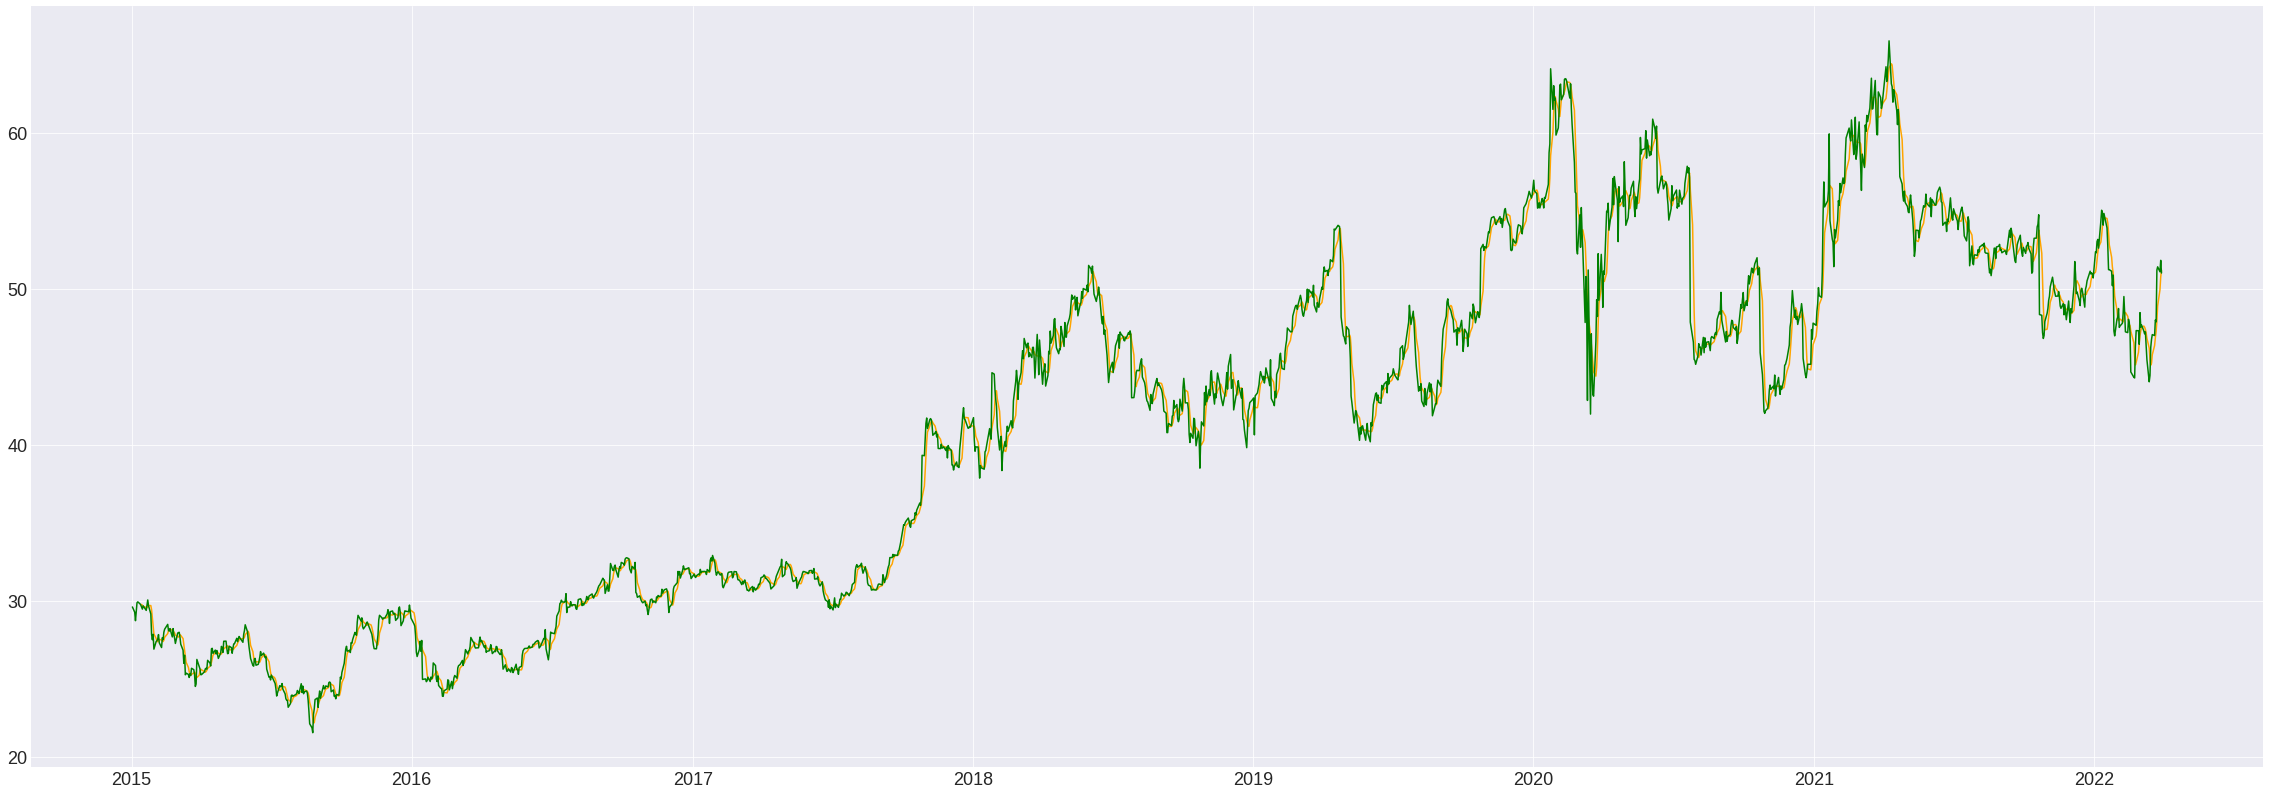

In [ ]:
plt.figure(figsize=(40,14))
plt.plot(alma_nums, color = 'orange')
plt.plot(INTEL_data['Adj Close'], color = 'green')

In [ ]:
strategy3 = sto.StockDataHandling.strategy_three(INTEL_data, ema, alma_nums)
INTEL_data["Strategy3"] = strategy3
INTEL_data.head()

,Open,High,Low,Close,Adj Close,Volume,prediction,Strategy1,Strategy2,Strategy3
Date,,,,,,,,,,
2015-01-02,36.669998,37.160000,36.110001,36.360001,29.616629,23605600,30.590000,-1,-1,-1
2015-01-05,36.200001,36.450001,35.939999,35.950001,29.282667,32785000,30.889999,-1,-1,-1
2015-01-06,36.080002,36.230000,35.259998,35.279999,28.736917,30847600,30.740000,1,-1,-1
2015-01-07,35.639999,36.070000,35.270000,36.020000,29.339682,27725200,31.309999,1,-1,-1
2015-01-08,36.369999,37.000000,36.259998,36.689999,29.885418,31765400,31.200001,1,-1,-1


In [ ]:
##Identifying Variables
##important to use double brackets

xfeature = INTEL_data[['Adj Close']]
yfeature = INTEL_data['Strategy3']

xfeature.head()

,Adj Close
Date,
2015-01-02,29.616629
2015-01-05,29.282667
2015-01-06,28.736917
2015-01-07,29.339682
2015-01-08,29.885418


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 8)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [ ]:
y_pred = rf_clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest - Strategy 3")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.5589041095890411


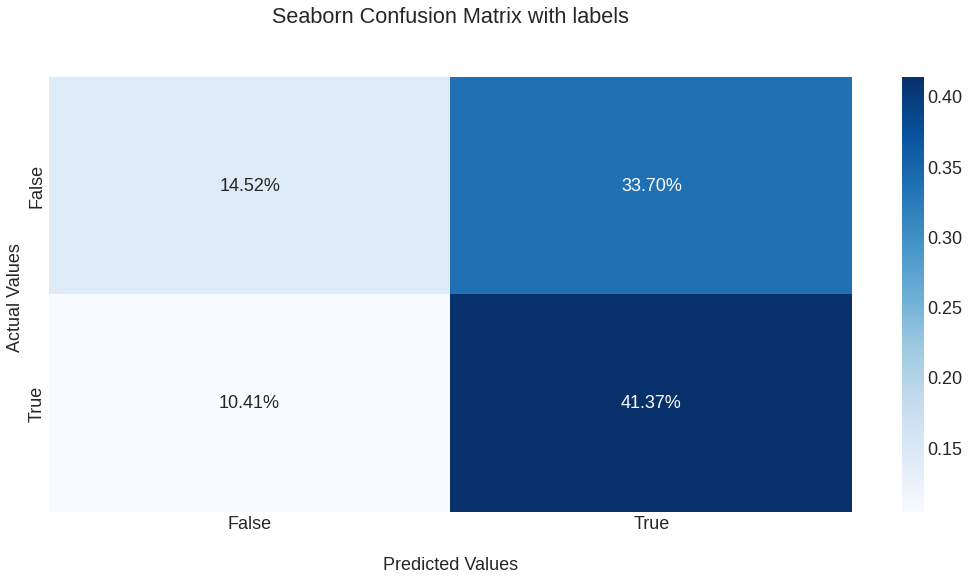

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Results

In [ ]:
d = {
    'Algorithm': S2listofmodels,
    'Accuracy': S2listofaccuracies
}
df = pd.DataFrame(data=d)
df

,Algorithm,Accuracy
0,Random Forest - Strategy 1,0.504110
1,Random Forest - Strategy 2,0.687671
2,Random Forest - Strategy 3,0.558904
